<a href="https://colab.research.google.com/github/sekhar0146/ML_Classification_projects/blob/main/Insurance_Lead_Prediction_CTcodes_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Health Insurance Lead Prediction - AV
FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
import pickle
from joblib import dump, load
# Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

In [539]:
# Import the data
df = pd.read_csv("/content/drive/MyDrive/AV/train.csv")
testdf = pd.read_csv("/content/drive/MyDrive/AV/test.csv")
testfile = testdf

In [540]:
df.shape, testdf.shape

((50882, 14), (21805, 13))

In [541]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [542]:
testdf.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [543]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

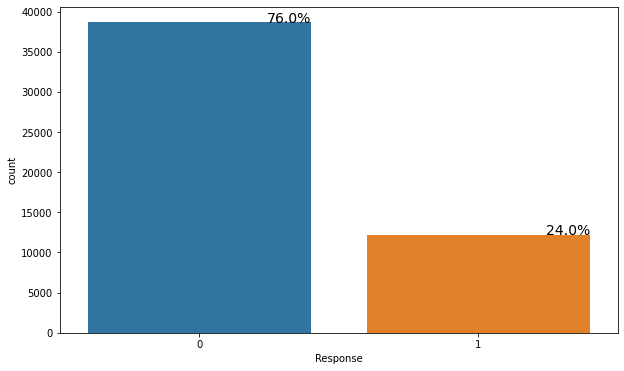

In [ ]:
plt.figure(figsize=(10,6))
s = sns.countplot(x='Response', data=df)

# Display value percentage on Response
total = float(len(df))

for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=14)
plt.show();

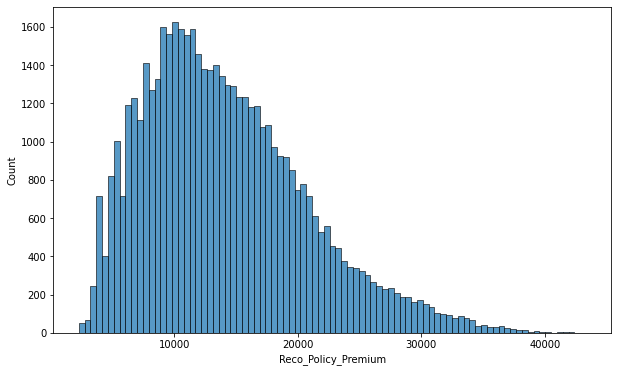

In [ ]:
# Understand the Reco_Policy_Premium distribution
plt.figure(figsize=(10,6))
sns.histplot(x='Reco_Policy_Premium', data=df);

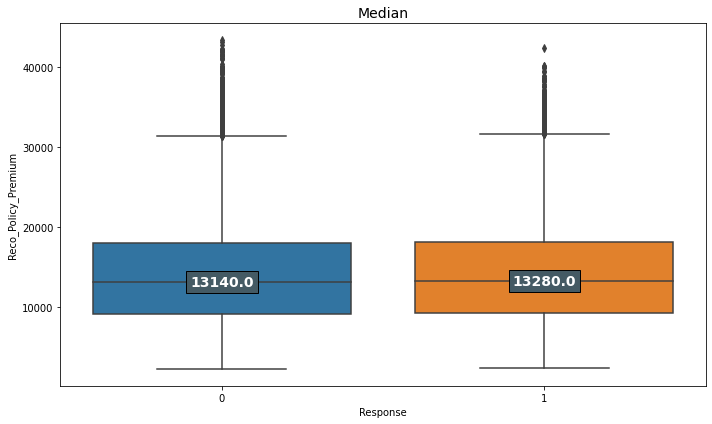

In [ ]:
plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x='Response', y='Reco_Policy_Premium', data=df)

# Diaplay mean data labels in boxplot
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
ax.set_title("Median", size="14")

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

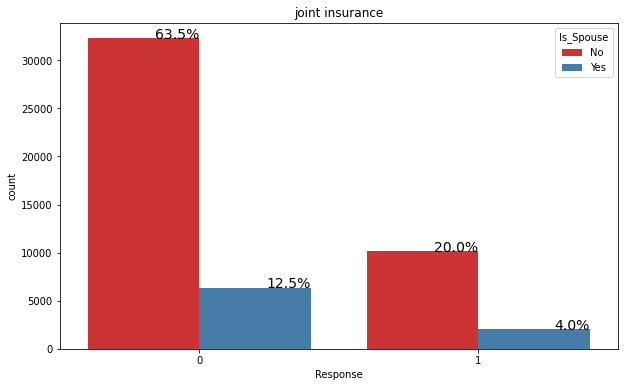

In [ ]:
#==> Response vs Is_spouse
plt.figure(figsize=(10,6))
s = sns.countplot(x='Response', hue='Is_Spouse', data=df, palette='Set1')
plt.title('joint insurance')
# Display value percentage 
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=14)

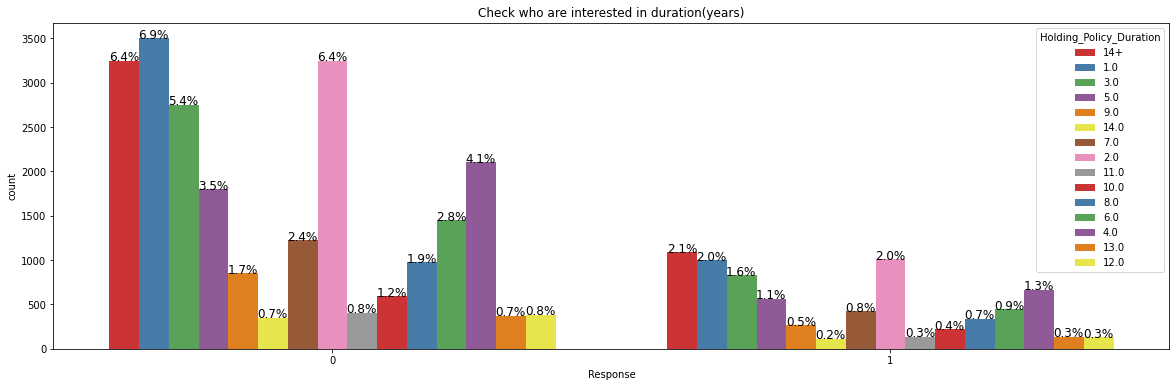

In [ ]:
#==> Response vs Holding_Policy_Duration
plt.figure(figsize=(20,6))
s = sns.countplot(x='Response', hue='Holding_Policy_Duration', data=df, palette='Set1')
plt.title('Check who are interested in duration(years)')
# Display value percentage 
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=12)

In [ ]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Checking the correlation
df.corr()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.000465,-0.001725,0.001101,0.006649,-0.002235,-0.002350,0.005159
Region_Code,-0.000465,1.000000,-0.005649,-0.005928,0.011599,-0.065120,-0.010797,0.001121
Upper_Age,-0.001725,-0.005649,1.000000,0.921392,0.141890,0.025257,0.792689,0.002772
Lower_Age,0.001101,-0.005928,0.921392,1.000000,0.118028,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.006649,0.011599,0.141890,0.118028,1.000000,0.079678,0.121342,0.009297
Reco_Policy_Cat,-0.002235,-0.065120,0.025257,0.021163,0.079678,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.002350,-0.010797,0.792689,0.615739,0.121342,0.060989,1.000000,0.007943
Response,0.005159,0.001121,0.002772,-0.002099,0.009297,0.114321,0.007943,1.000000


In [ ]:
# # Checking the correlation corresponding to the target variable
df.corr()['Response'].sort_values()

Lower_Age             -0.002099
Region_Code            0.001121
Upper_Age              0.002772
ID                     0.005159
Reco_Policy_Premium    0.007943
Holding_Policy_Type    0.009297
Reco_Policy_Cat        0.114321
Response               1.000000
Name: Response, dtype: float64

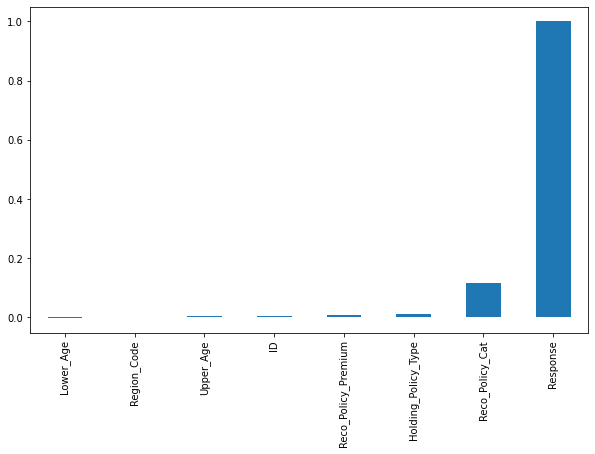

In [ ]:
plt.figure(figsize=(10,6))
df.corr()['Response'].sort_values().plot(kind='bar');

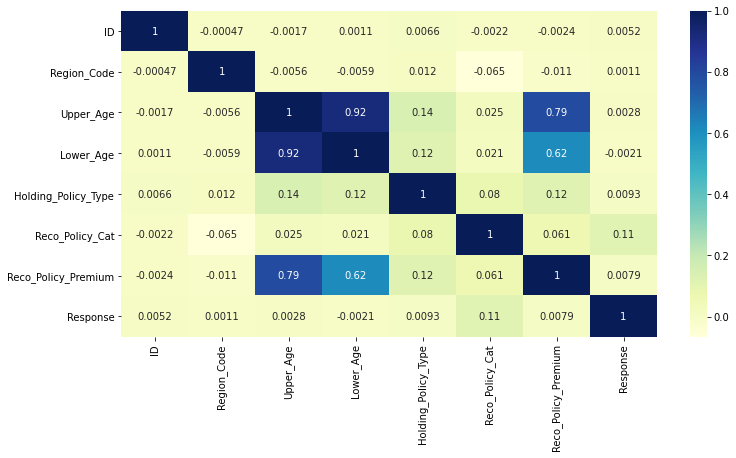

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show();

Define a preprocess function

In [544]:
def preprocess_data(df1):
    # Fill numeric rows with median
    for label, content in df1.items():
        if pd.api.types.is_numeric_dtype(content):
        #x = pd.isnull(content).sum()
        #print(x)
            if pd.isnull(content).sum():
            # add binary column which tells us if the data was missing or not
                df1[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with meadian
                df1[label] = content.fillna(content.median())
            
        # Fill catogortical missing data and turn into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df1[label+"_is_missing"] = pd.isnull(content)
            # we add +1 to category code
            df1[label] = pd.Categorical(content).codes+1
    
    return df1

In [545]:
# Process train data
df = preprocess_data(df)

In [546]:
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_is_missing,Accomodation_Type_is_missing,Reco_Insurance_Type_is_missing,Is_Spouse_is_missing,Health Indicator_is_missing,Holding_Policy_Duration_is_missing,Holding_Policy_Type_is_missing
0,1,23,3213,2,1,36,36,1,1,6,3.0,22,11628.0,0,False,False,False,False,False,False,False
1,2,32,1117,1,2,75,22,1,2,0,3.0,22,30510.0,0,False,False,False,False,False,True,True
2,3,32,3732,1,1,32,32,1,0,1,1.0,19,7450.0,1,False,False,False,False,True,False,False
3,4,17,4378,1,2,52,48,1,1,6,3.0,19,17780.0,0,False,False,False,False,False,False,False
4,5,35,2190,2,1,44,44,1,2,9,1.0,16,10404.0,0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,31,845,2,1,22,22,1,3,0,3.0,18,7704.0,0,False,False,False,False,False,True,True
50878,50879,32,4188,2,1,27,27,1,3,13,3.0,4,5408.0,0,False,False,False,False,False,False,False
50879,50880,1,442,2,1,63,63,1,2,6,1.0,12,11374.0,0,False,False,False,False,False,False,False
50880,50881,1,4,1,2,71,49,1,2,8,2.0,16,28179.2,1,False,False,False,False,False,False,False


In [547]:
df.isna().sum()

ID                                    0
City_Code                             0
Region_Code                           0
Accomodation_Type                     0
Reco_Insurance_Type                   0
Upper_Age                             0
Lower_Age                             0
Is_Spouse                             0
Health Indicator                      0
Holding_Policy_Duration               0
Holding_Policy_Type                   0
Reco_Policy_Cat                       0
Reco_Policy_Premium                   0
Response                              0
City_Code_is_missing                  0
Accomodation_Type_is_missing          0
Reco_Insurance_Type_is_missing        0
Is_Spouse_is_missing                  0
Health Indicator_is_missing           0
Holding_Policy_Duration_is_missing    0
Holding_Policy_Type_is_missing        0
dtype: int64

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  50882 non-null  int64  
 1   City_Code                           50882 non-null  int8   
 2   Region_Code                         50882 non-null  int64  
 3   Accomodation_Type                   50882 non-null  int8   
 4   Reco_Insurance_Type                 50882 non-null  int8   
 5   Upper_Age                           50882 non-null  int64  
 6   Lower_Age                           50882 non-null  int64  
 7   Is_Spouse                           50882 non-null  int8   
 8   Health Indicator                    50882 non-null  int8   
 9   Holding_Policy_Duration             50882 non-null  int8   
 10  Holding_Policy_Type                 50882 non-null  float64
 11  Reco_Policy_Cat                     50882

In [549]:
# Process test data
testdf = preprocess_data(testdf)

In [550]:
testdf.isna().sum()

ID                                    0
City_Code                             0
Region_Code                           0
Accomodation_Type                     0
Reco_Insurance_Type                   0
Upper_Age                             0
Lower_Age                             0
Is_Spouse                             0
Health Indicator                      0
Holding_Policy_Duration               0
Holding_Policy_Type                   0
Reco_Policy_Cat                       0
Reco_Policy_Premium                   0
City_Code_is_missing                  0
Accomodation_Type_is_missing          0
Reco_Insurance_Type_is_missing        0
Is_Spouse_is_missing                  0
Health Indicator_is_missing           0
Holding_Policy_Duration_is_missing    0
Holding_Policy_Type_is_missing        0
dtype: int64

In [551]:
df.shape, testdf.shape

((50882, 21), (21805, 20))

In [500]:
# Find the column differences b/w training and test data sets
print("Find the column differences b/w training and test data sets:")
print(set(df.columns) - set(testdf.columns))


Find the column differences b/w training and test data sets:
{'Response'}


Response - column is not in testdf. This is usual as we need to predict this.

In [501]:
# Find the column differences b/w test and train data sets
print("Find the column differences b/w test and train data sets:")
print(set(testdf.columns) - set(df.columns))


Find the column differences b/w test and train data sets:
set()


Drop few column which are not needed

In [552]:
df = df.drop(["ID"], axis=1) # train set
testdf = testdf.drop(["ID"], axis=1) # test set

Split train set into training and test

In [553]:
y = df["Response"]
X = df.drop(["Response"], axis=1)
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(data = scaler.transform(X), columns = X.columns)
# split the data into two categories, one for training and the other for testing
X_public_sc, X_private_sc, _, _ = train_test_split(X_scaled, y, test_size=0.60, random_state=42)
# We do the same split on the unscalled data, we'll use these ones later for the plots
X_public, X_private, y_public, y_private = train_test_split(X, y, test_size=0.60, random_state=42)
# Display the first samples of the dataset
X_scaled.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_is_missing,Accomodation_Type_is_missing,Reco_Insurance_Type_is_missing,Is_Spouse_is_missing,Health Indicator_is_missing,Holding_Policy_Duration_is_missing,Holding_Policy_Type_is_missing
0,0.628571,0.518650,1.0,0.0,0.315789,0.338983,0.0,0.111111,0.400000,0.666667,1.000000,0.227609,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.885714,0.180203,0.0,1.0,1.000000,0.101695,0.0,0.222222,0.000000,0.666667,1.000000,0.687356,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.885714,0.602454,0.0,0.0,0.245614,0.271186,0.0,0.000000,0.066667,0.000000,0.857143,0.125881,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.457143,0.706766,0.0,1.0,0.596491,0.542373,0.0,0.111111,0.400000,0.666667,0.857143,0.377401,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.971429,0.353464,1.0,0.0,0.456140,0.474576,0.0,0.222222,0.600000,0.000000,0.714286,0.197807,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Model building

Model LGBM

In [554]:
import lightgbm as lgb
np.random.seed(42)

lg = lgb.LGBMClassifier(min_samples_split = 1200,
                        min_samples_leaf = 20,
                        max_depth = 12,subsample_for_bin=20000)
#                        colsample_bytree=1.0, reg_alpha=0.5, reg_lambda=0.5) 
lg.fit(X_public_sc,y_public)
y_pred = lg.predict(X_private_sc)
y_pred_proba = lg.predict_proba(X_private_sc)
print("model score - ", lg.score(X_private_sc, y_private))
print("model accuracy - ", accuracy_score(y_private, y_pred))

model score -  0.7595152309204062
model accuracy -  0.7595152309204062


In [555]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [556]:
# Confution matrix
print(confusion_matrix(y_private, y_pred))

[[23055   138]
 [ 7204   133]]


In [557]:
cf = pd.crosstab(y_private,
                 y_pred,
                 rownames=["Actual labels"],
                 colnames=["Predicted labels"])
cf

Predicted labels,0,1
Actual labels,,
0,23055,138
1,7204,133


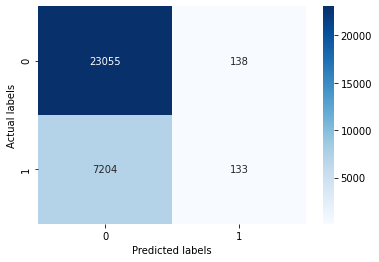

In [558]:
sns.heatmap(cf, annot=True, cmap='Blues', fmt='g');

In [559]:
print(classification_report(y_private, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86     23193
           1       0.49      0.02      0.03      7337

    accuracy                           0.76     30530
   macro avg       0.63      0.51      0.45     30530
weighted avg       0.70      0.76      0.66     30530



In [560]:
# predict_proba() returns probabilities of a classification label
#y_pred_proba = lg.predict_proba(X_test_sc)
y_pred_proba[:3]

array([[0.64724364, 0.35275636],
       [0.7238814 , 0.2761186 ],
       [0.76472193, 0.23527807]])

In [561]:
# get the data related to '1'
y_prob_positive = y_pred_proba[:, 1]
y_prob_positive[:5]

array([0.35275636, 0.2761186 , 0.23527807, 0.36572544, 0.25049009])

In [562]:
from sklearn.metrics import roc_curve
# Calculate fpr, tpr and thresholds 
fpr, tpr, thesholds = roc_curve(y_private, y_prob_positive)
fpr[:5]

array([0.00000000e+00, 4.31164576e-05, 1.29349373e-04, 1.29349373e-04,
       1.72465830e-04])

In [563]:
# Visual representation 
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    # plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # customize plots
    plt.xlabel("False predictive rate(fpr)")
    plt.ylabel("True predictive rate(tpr)")
    plt.title("Receiver operating characterstic curse (ROC ")
    plt.legend()
    plt.show()

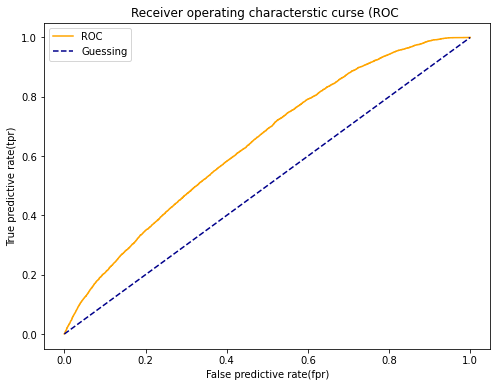

In [564]:
plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)

In [565]:
# check the accurate score
from sklearn.metrics import roc_auc_score
print("Prob positive score is : ")
print(roc_auc_score(y_private, y_prob_positive))

Prob positive score is : 
0.642045144923217


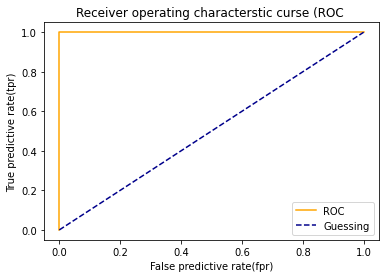

1.0

In [530]:
  # plot perfect ROC curve and AUC score
fpr, tpr, thesholds = roc_curve(y_private, y_private)
plot_roc_curve(fpr, tpr)
roc_auc_score(y_private, y_private)

#Process Tsest Set



In [566]:
testdf.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_is_missing,Accomodation_Type_is_missing,Reco_Insurance_Type_is_missing,Is_Spouse_is_missing,Health Indicator_is_missing,Holding_Policy_Duration_is_missing,Holding_Policy_Type_is_missing
0,1,156,1,1,30,30,1,0,12,3.0,5,11934.0,False,False,False,False,True,False,False
1,31,7,1,2,69,68,2,1,9,3.0,18,32204.8,False,False,False,False,False,False,False
2,1,564,2,1,28,28,1,3,8,4.0,17,9240.0,False,False,False,False,False,False,False
3,23,1177,2,1,23,23,1,3,9,3.0,18,9086.0,False,False,False,False,False,False,False
4,1,951,1,1,75,75,1,3,0,3.0,5,22534.0,False,False,False,False,False,True,True


In [532]:
testdf_sc = pd.DataFrame(data = scaler.transform(testdf), columns = testdf.columns)
testdf_sc

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_is_missing,Accomodation_Type_is_missing,Reco_Insurance_Type_is_missing,Is_Spouse_is_missing,Health Indicator_is_missing,Holding_Policy_Duration_is_missing,Holding_Policy_Type_is_missing
0,0.0,0.0,0.210526,0.237288,0.0,0.000000,0.800000,0.666667,0.190476,0.235060,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.894737,0.881356,1.0,0.111111,0.600000,0.666667,0.809524,0.728622,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.175439,0.203390,0.0,0.333333,0.533333,1.000000,0.761905,0.169465,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.087719,0.118644,0.0,0.333333,0.600000,0.666667,0.809524,0.165715,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.000000,1.000000,0.0,0.333333,0.000000,0.666667,0.190476,0.493153,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,0.0,0.0,0.473684,0.491525,0.0,0.111111,0.666667,0.000000,0.809524,0.331236,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21801,0.0,0.0,0.719298,0.728814,0.0,0.555556,0.800000,0.666667,0.809524,0.465299,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21802,0.0,0.0,0.982456,0.983051,0.0,0.333333,0.000000,0.666667,0.000000,0.378764,0.0,0.0,0.0,0.0,0.0,1.0,1.0
21803,1.0,0.0,0.122807,0.152542,0.0,0.444444,0.600000,0.000000,0.857143,0.226148,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [533]:
test_pred = lg.predict(testdf_sc)
test_pred_proba = lg.predict_proba(testdf_sc)
testfile['Response_pred'] = test_pred
testfile['Response_pred_prob0'] = test_pred_proba[:,0]
testfile['Response_pred_prob1'] = test_pred_proba[:,1]

In [534]:
testfile

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_is_missing,Accomodation_Type_is_missing,Reco_Insurance_Type_is_missing,Is_Spouse_is_missing,Health Indicator_is_missing,Holding_Policy_Duration_is_missing,Holding_Policy_Type_is_missing,Response_pred,Response_pred_prob0,Response_pred_prob1
0,50883,1,156,1,1,30,30,1,0,12,3.0,5,11934.0,False,False,False,False,True,False,False,0,0.606472,0.393528
1,50884,31,7,1,2,69,68,2,1,9,3.0,18,32204.8,False,False,False,False,False,False,False,0,0.772007,0.227993
2,50885,1,564,2,1,28,28,1,3,8,4.0,17,9240.0,False,False,False,False,False,False,False,0,0.765896,0.234104
3,50886,23,1177,2,1,23,23,1,3,9,3.0,18,9086.0,False,False,False,False,False,False,False,0,0.766751,0.233249
4,50887,1,951,1,1,75,75,1,3,0,3.0,5,22534.0,False,False,False,False,False,True,True,0,0.692227,0.307773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,23,1044,1,1,45,45,1,1,10,1.0,18,15884.0,False,False,False,False,False,False,False,0,0.823163,0.176837
21801,72684,31,266,1,1,59,59,1,5,12,3.0,18,21390.0,False,False,False,False,False,False,False,0,0.755834,0.244166
21802,72685,4,2470,1,1,74,74,1,3,0,3.0,1,17836.0,False,False,False,False,False,True,True,0,0.997291,0.002709
21803,72686,2,1676,2,1,25,25,1,4,9,1.0,19,11568.0,False,False,False,False,False,False,False,0,0.736523,0.263477


In [535]:
submission = pd.DataFrame()
submission['ID'] = testfile['ID']
submission['Response'] = testfile['Response_pred_prob1']

In [536]:
submission

,ID,Response
0,50883,0.393528
1,50884,0.227993
2,50885,0.234104
3,50886,0.233249
4,50887,0.307773
...,...,...
21800,72683,0.176837
21801,72684,0.244166
21802,72685,0.002709
21803,72686,0.263477


In [537]:
from google.colab import files
filepath='18_my_submission_CT_LG.csv'
submission.to_csv(filepath, index=False)
files.download(filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>